# Plot Training Logs : A2C_cartpole

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import json

##### Listing the available files

In [206]:
files = glob.glob('../models/A2C_Cartpole*_log.csv')
for no, file in enumerate(files):
    fname = file.replace('_', ' ')
    print(f"{no:2d} | {fname}")

 0 | ../models\A2C Cartpole 24-07-26 15-06 log.csv


In [207]:
choice = -1 # Make your choice here

##### Printing the hyperparameters

In [208]:
print('Hyperparameters \n' + '-'*40)
with open(files[choice].replace('log.csv','prms.json')) as jfile:
    prms = json.load(jfile)
    for key, val in prms.items():
        print(f'{key:25s} : {val}')


Hyperparameters 
----------------------------------------
NUM_EPISODES              : 1000
GAMMA                     : 0.9999
NORMALIZE_STRATEGY        : NONE
ACTOR_SIZE                : 4
ACTOR_LR                  : 0.002
ACTOR_DROPOUT_RATE        : 0.0
ACTOR_L2_ALPHA            : 0
ACTOR_TWO_NN_LAYERS       : False
CRITIC_SIZE               : 4
CRITIC_LR                 : 0.005
CRITIC_DROPOUT_RATE       : 0.0
CRITIC_L2_ALPHA           : 0
CRITIC_TWO_NN_LAYERS      : False


##### Plotting the data

In [209]:
df = pd.read_csv(files[choice])

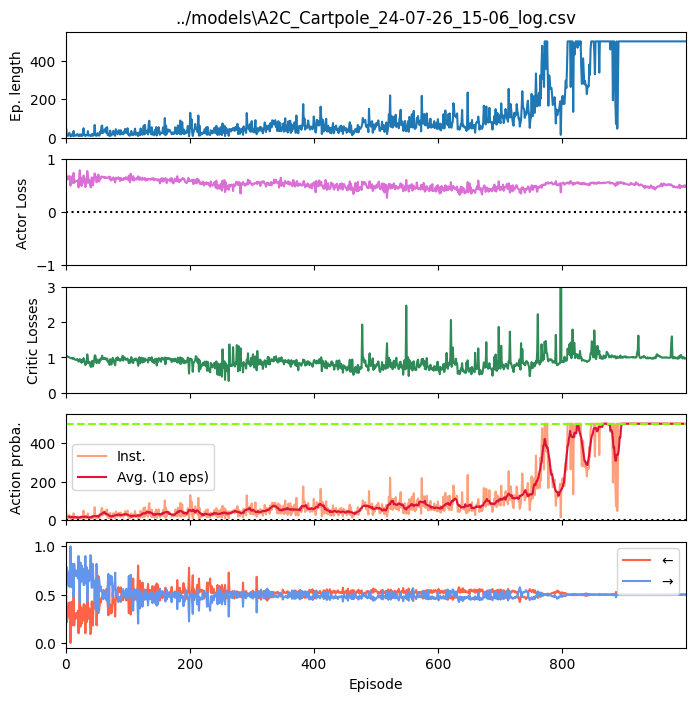

In [210]:
fig, axes = plt.subplots(nrows=5, sharex=True, figsize=[8,8])

axes[0].plot(df['episode'], df['step'])
axes[1].plot(df['episode'], df['a_loss'], color='orchid')
axes[2].plot(df['episode'], df['c_loss'], color='seagreen')
axes[3].plot(df['episode'], df['cum_reward'], color='lightsalmon', label='Inst.')
axes[3].plot(df['episode'], df['cum_reward'].rolling(10, center=True).mean(), color='crimson', label='Avg. (10 eps)')
axes[4].plot(df['episode'], df['left_frac'], color='tomato', label='←')
axes[4].plot(df['episode'], df['right_frac'], color='cornflowerblue', label='→')


# Formatting
axes[1].plot(df['episode'], np.zeros_like(df['cum_reward']), 'k:')
axes[3].plot(df['episode'], np.zeros_like(df['cum_reward']), 'k:')
axes[3].plot(df['episode'], 500 * np.ones_like(df['cum_reward']), '--', color='chartreuse')
axes[0].set_ylabel('Ep. length')
axes[1].set_ylabel('Actor Loss')
axes[2].set_ylabel('Critic Losses')
axes[3].set_ylabel('Reward')
axes[3].set_ylabel('Action proba.')
axes[3].legend()
axes[4].legend()

axes[0].set_ylim([0, 550])
axes[1].set_ylim([-1,1])
axes[2].set_ylim([0, 3])
axes[3].set_ylim([0,550])

axes[3].set_xlim([0, df['episode'].max()])

axes[4].set_xlabel('Episode')

axes[0].set_title(files[choice])

fig.savefig(files[choice].replace('log.csv','fig.png'))